# Test notebook

Notebook for checking code functionality and possible issues.

**Import packages**

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits

## Debugging

*Dataframe Indexing*

In [3]:
file = "metis_all/LTP5/STP168/solo_l0_metis-vl-image_0686221506_v01.fits"
file = fits.open(file)
values =file[0].header
pd.DataFrame([values]).columns
print(len(pd.DataFrame([values]).columns))

27


In [4]:
new_cols = ['APID', 'BITPIX', 'BLANK', 'CHECKSUM', 'COMMENT', 'COMPRESS',
       'COMP_RAT', 'CREATOR', 'DATAMAX', 'DATAMIN', 'DATASUM', 'EXTEND',
       'FILENAME', 'FILE_RAW', 'HISTORY', 'INSTRUME', 'LEVEL', 'LONGSTRN',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'OBT_BEG', 'OBT_END', 'ORIGIN', 'SIMPLE',
       'VERSION', 'VERS_SW']

df = pd.DataFrame(columns=new_cols + ["LTP", "STP", "IDX"])
df1 = pd.DataFrame([values])

df2 = pd.DataFrame([[1, 2, 3]], columns= ["LTP", "STP", "IDX"])

dff = pd.concat([df1, df2], axis = 1)
df.loc[len(df)] = dff.iloc[0]

## Testing

**Load headers**

In [5]:
headers = pd.read_pickle("fits_files.pkl")
headers.head(5)

,APID,BITPIX,BLANK,CHECKSUM,COMMENT,COMPRESS,COMP_RAT,CREATOR,DATAMAX,DATAMIN,...,ORIGIN,SIMPLE,VERSION,VERS_SW,LTP,STP,IDX,TIMESTAMP,STARS,OBJECTS
0,1084,16,-32768,EiLaGhIXEhIaEhIW,[Compression was enabled. The compression head...,Lossless,9.99377,metis_l0_prep.pro,4700,1333,...,"Altec, Italy",True,01,1.1.0 | 2.1.1,LTP5,STP168,0,2021 SEP 29 09:20:00.7855,0,34
1,1084,16,-32768,8XJG9WGE8WGE8WGE,[Compression was enabled. The compression head...,Lossless,10.0115,metis_l0_prep.pro,4687,1331,...,"Altec, Italy",True,01,1.1.0 | 2.1.1,LTP5,STP169,0,2021 OCT 08 01:19:30.3978,0,38
2,1084,16,-32768,ADH2BAH2AAH2AAH2,[Compression was enabled. The compression head...,Lossless,10.0339,metis_l0_prep.pro,9893,1328,...,"Altec, Italy",True,01,1.1.0 | 2.1.1,LTP5,STP170,0,2021 OCT 17 02:46:53.8592,0,47
3,1084,16,-32768,ROUBSMUARMUARMUA,[Compression was enabled. The compression head...,Lossless,10.0447,metis_l0_prep.pro,9107,1330,...,"Altec, Italy",True,01,1.1.0 | 2.1.1,LTP5,STP171,0,2021 OCT 18 20:18:29.3279,1,38
4,1084,16,-32768,JeRXKdPWJdPWJdPW,[Compression was enabled. The compression head...,Lossless,10.0307,metis_l0_prep.pro,9172,1329,...,"Altec, Italy",True,01,1.1.0 | 2.1.1,LTP5,STP171,1,2021 OCT 18 20:20:00.8281,1,50


**Load objects**

In [10]:
objects = pd.read_pickle("objects_files.pkl")
objects.head(10)

,LTP,STP,IDX,PEAK_VAL,X_COORD,Y_COORD,PRE_LABEL,INFO,REGION,FILENAME
1,LTP5,STP168,0,3195.0,805,87,object,info,"[[2883.0, 2849.0, 2849.0, 2932.0, 2932.0, 2937...",solo_l0_metis-vl-image_0686221506_v01.fits
4,LTP5,STP168,0,3020.0,993,273,object,info,"[[2725.0, 2746.0, 2746.0, 2703.0, 2703.0, 2749...",solo_l0_metis-vl-image_0686221506_v01.fits
5,LTP5,STP168,0,3078.0,1887,296,object,info,"[[2455.0, 2452.0, 2452.0, 2414.0, 2414.0, 2416...",solo_l0_metis-vl-image_0686221506_v01.fits
8,LTP5,STP168,0,2638.0,395,347,object,info,"[[2295.0, 2308.0, 2308.0, 2319.0, 2319.0, 2321...",solo_l0_metis-vl-image_0686221506_v01.fits
10,LTP5,STP168,0,3413.0,1593,351,object,info,"[[2830.0, 2847.0, 2847.0, 2815.0, 2815.0, 2824...",solo_l0_metis-vl-image_0686221506_v01.fits
11,LTP5,STP168,0,4700.0,1521,441,object,info,"[[2666.0, 2670.0, 2670.0, 2667.0, 2667.0, 2630...",solo_l0_metis-vl-image_0686221506_v01.fits
12,LTP5,STP168,0,2967.0,1843,459,object,info,"[[2587.0, 2613.0, 2613.0, 2571.0, 2571.0, 2537...",solo_l0_metis-vl-image_0686221506_v01.fits
13,LTP5,STP168,0,2709.0,1903,476,object,info,"[[2494.0, 2527.0, 2527.0, 2494.0, 2494.0, 2510...",solo_l0_metis-vl-image_0686221506_v01.fits
23,LTP5,STP168,0,2257.0,327,856,object,info,"[[2003.0, 2026.0, 2026.0, 2056.0, 2056.0, 2059...",solo_l0_metis-vl-image_0686221506_v01.fits
24,LTP5,STP168,0,2687.0,1615,847,object,info,"[[2463.0, 2454.0, 2454.0, 2438.0, 2438.0, 2543...",solo_l0_metis-vl-image_0686221506_v01.fits


**Display objects**

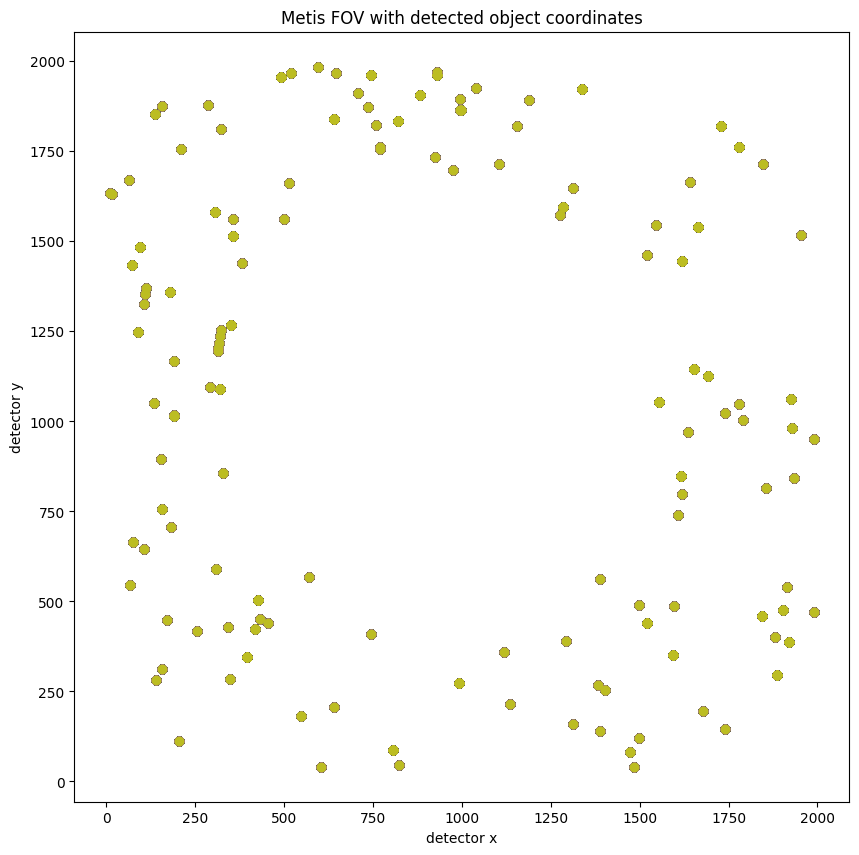

In [13]:
# DIsplay metis FOV
fig, axis = plt.subplots(1, 1, figsize = (10, 10))

axis.set_xlabel("detector x")
axis.set_ylabel("detector y")
axis.set_title("Metis FOV with detected object coordinates")
# Retrieve coordinates.
x = objects["X_COORD"]
y = objects["Y_COORD"]

for i in range(len(objects)):
    axis.scatter(x, y)

